In [1]:
import torch
import torch.optim as optim
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
%matplotlib inline

Bad val 'GTKAgg' on line #32
	"backend      : GTKAgg
"
	in file "/home/alex/.local/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc"
	Key backend: Unrecognized backend string 'gtkagg': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [2]:
def rastrigin(x):
    A=1.0
    return A*2 + x[0]**2 - A*torch.cos(2*math.pi*x[0]) + x[1]**2 - A*torch.cos(2*math.pi*x[1])
    
                

In [3]:
print(rastrigin(torch.tensor([2.1,-1.3])))


tensor(7.6000)


In [4]:

def SGD(p, epochs=100):
    opt = optim.SGD([p], lr=0.01)
    outputs = []
    for i in range(epochs):
        opt.zero_grad()
        output = rastrigin(p)
        outputs.append(output.data)
        output.backward()
        opt.step()
    return outputs

def SGDM(p, epochs=100):
   
    opt = optim.SGD([p], lr=0.01, momentum=0.9)
    outputs = []
    for i in range(epochs):
        opt.zero_grad()
        output = rastrigin(p)
        outputs.append(output.data)
        output.backward()
        opt.step()
    return outputs


def Adagrad(p, epochs=100):
    opt = optim.Adagrad([p], lr=0.01)
    outputs = []
    for i in range(epochs):
        opt.zero_grad()
        output = rastrigin(p)
        outputs.append(output.data)
        output.backward()
        opt.step()
    return outputs


def Adam(p, epochs=100):
    opt = optim.Adam([p], lr=0.01)
    outputs = []
    for i in range(epochs):
        opt.zero_grad()
        output = rastrigin(p)
        outputs.append(output.data)
        output.backward()
        opt.step()
    return outputs





In [5]:
p = torch.tensor([5.0,5.0], requires_grad=True)
result_SGD = SGD(p)
#print(f"SGD is {result_SGD}")

p = torch.tensor([5.0,5.0], requires_grad=True)
result_SGDM = SGDM(p)
#print(f"SGDM is {result_SGDM}")

p = torch.tensor([5.0,5.0], requires_grad=True)
result_Adagrad = Adagrad(p)
#print(f"Adagrad is {result_Adagrad}")

p = torch.tensor([5.0,5.0], requires_grad=True)
result_Adam = Adam(p)
#print(f"Adam is {result_Adam}")

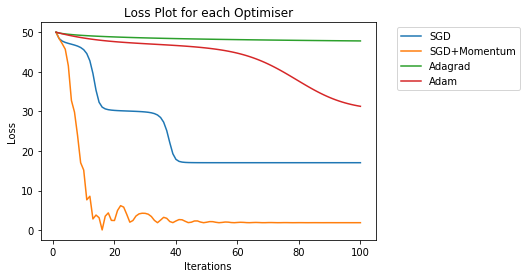

In [12]:
x_values = np.linspace(1,100,100)
plt.plot(x_values, result_SGD, label="SGD")
plt.plot(x_values, result_SGDM, label = "SGD+Momentum")
plt.plot(x_values, result_Adagrad, label="Adagrad")
plt.plot(x_values, result_Adam, label="Adam")
plt.title("Loss Plot for each Optimiser")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.savefig("Loss_Plot.png", bbox_inches="tight")